In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [32]:
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(
    "gdp_per_capita.csv",
    thousands=",",
    delimiter=",",
    encoding="latin1"
)

In [33]:
print(oecd_bli.columns)
print(gdp_per_capita.columns)

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')
Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')


In [34]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    # --- 1. Keep only Life Satisfaction rows ---
    oecd_bli = oecd_bli[oecd_bli["Indicator"] == "Life satisfaction"]

    # --- 2. Remove duplicates for same country ---
    oecd_bli = oecd_bli.drop_duplicates(subset="Country", keep="first")

    # --- 3. Pivot OECD data: Country → Life satisfaction value ---
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

    # --- 4. Clean GDP dataframe ---
    # Rename GDP column from 2015 to GDP per capita
    gdp_per_capita = gdp_per_capita.drop_duplicates(subset="Country", keep="first")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)

    # Set Country column as index
    gdp_per_capita.set_index("Country", inplace=True)

    # --- 5. Merge both datasets ---
    full_country_stats = oecd_bli.join(gdp_per_capita, how="inner")

    # --- 6. Remove any remaining duplicates ---
    full_country_stats = full_country_stats[~full_country_stats.index.duplicated(keep="first")]

    # --- 7. Sort by GDP per capita ---
    full_country_stats.sort_values(by="GDP per capita", inplace=True)

    return full_country_stats


In [35]:
country_stats = prepare_country_stats(oecd_bli,gdp_per_capita)

In [36]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

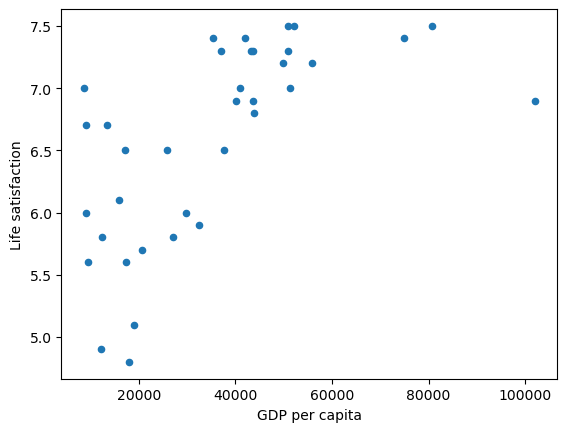

In [37]:
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()

In [38]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [39]:
model.predict([[22587]])

array([[6.28653637]])